In [11]:
import pickle

import numpy as np
import pandas as pd

import hist
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
%matplotlib inline
mpl.style.use(mplhep.style.ROOT)

In [35]:
with open('modified-ana-results.pkl','rb') as f:
    d = pickle.load(f)

In [39]:
d['signal']['roacc'][d['signal']['roacc'].mchi==50]

,eps2,mchi,rdmchi,rmap,num_thrown,prod_rate,std_num_pass,std_reweightsum,std_reweightsum_pass,mod_num_pass,mod_reweightsum,mod_reweightsum_pass,std_z_cut_eff,std_event_selection_eff,std_full_eff,std_full_rate,mod_z_cut_eff,mod_event_selection_eff,mod_full_eff,mod_full_rate
75,0.000001,50.0,0.4,2.0,2000000,1.343740e+04,182,0.049775,2.250711e-02,9,2.412609e-03,2.412609e-03,4.521756e-01,0.000091,4.114798e-05,5.529220e-01,1.000000e+00,0.000005,4.500000e-06,6.046831e-02
76,0.000001,50.0,0.4,2.4,2000000,7.876023e+03,485,0.060012,1.943014e-02,80,9.519787e-03,8.764719e-03,3.237719e-01,0.000243,7.851469e-05,6.183835e-01,9.206843e-01,0.000040,3.682737e-05,2.900532e-01
77,0.000001,50.0,0.4,2.5,4000000,7.011854e+03,1083,0.111963,3.036165e-02,188,1.886292e-02,1.818770e-02,2.711761e-01,0.000271,7.342093e-05,5.148168e-01,9.642038e-01,0.000047,4.531758e-05,3.177603e-01
78,0.000001,50.0,0.4,2.6,2000000,6.291466e+03,562,0.048015,1.358471e-02,102,8.456831e-03,8.159189e-03,2.829278e-01,0.000281,7.950271e-05,5.001886e-01,9.648045e-01,0.000051,4.920503e-05,3.095718e-01
79,0.000001,50.0,0.4,3.0,4000000,4.154253e+03,1098,0.051103,1.201090e-02,255,1.151409e-02,1.067783e-02,2.350326e-01,0.000275,6.451645e-05,2.680176e-01,9.273709e-01,0.000064,5.911989e-05,2.455990e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,0.010000,50.0,0.6,2.0,2000000,1.343740e+08,2092,3.376172,3.373984e-17,279,1.899315e-13,5.900459e-123,9.993519e-18,0.001046,1.045322e-20,1.404641e-12,3.106625e-110,0.000140,4.333741e-114,5.823423e-106
6260,0.010000,50.0,0.6,2.4,2000000,7.876023e+07,2219,17.278412,3.728479e-05,583,1.476137e+00,3.214136e-43,2.157883e-06,0.001110,2.394171e-09,1.885655e-01,2.177397e-43,0.000291,6.347113e-47,4.999001e-39
6261,0.010000,50.0,0.6,2.5,4000000,7.011854e+07,4158,15.307261,2.190237e-03,1182,8.805386e+00,3.215858e-33,1.430848e-04,0.001040,1.487367e-07,1.042920e+01,3.652149e-34,0.000296,1.079210e-37,7.567263e-30
6262,0.010000,50.0,0.6,2.6,2000000,6.291466e+07,2107,5.871072,6.284145e-03,557,3.459582e+00,3.822909e-33,1.070357e-03,0.001053,1.127622e-06,7.094393e+01,1.105020e-33,0.000278,3.077482e-37,1.936187e-29


2.0 0.4
2.0 0.5
2.0 0.6
2.4 0.4
2.4 0.5
2.4 0.6
2.5 0.4
2.5 0.5
2.5 0.6
2.6 0.4
2.6 0.5
2.6 0.6
3.0 0.4
3.0 0.5
3.0 0.6


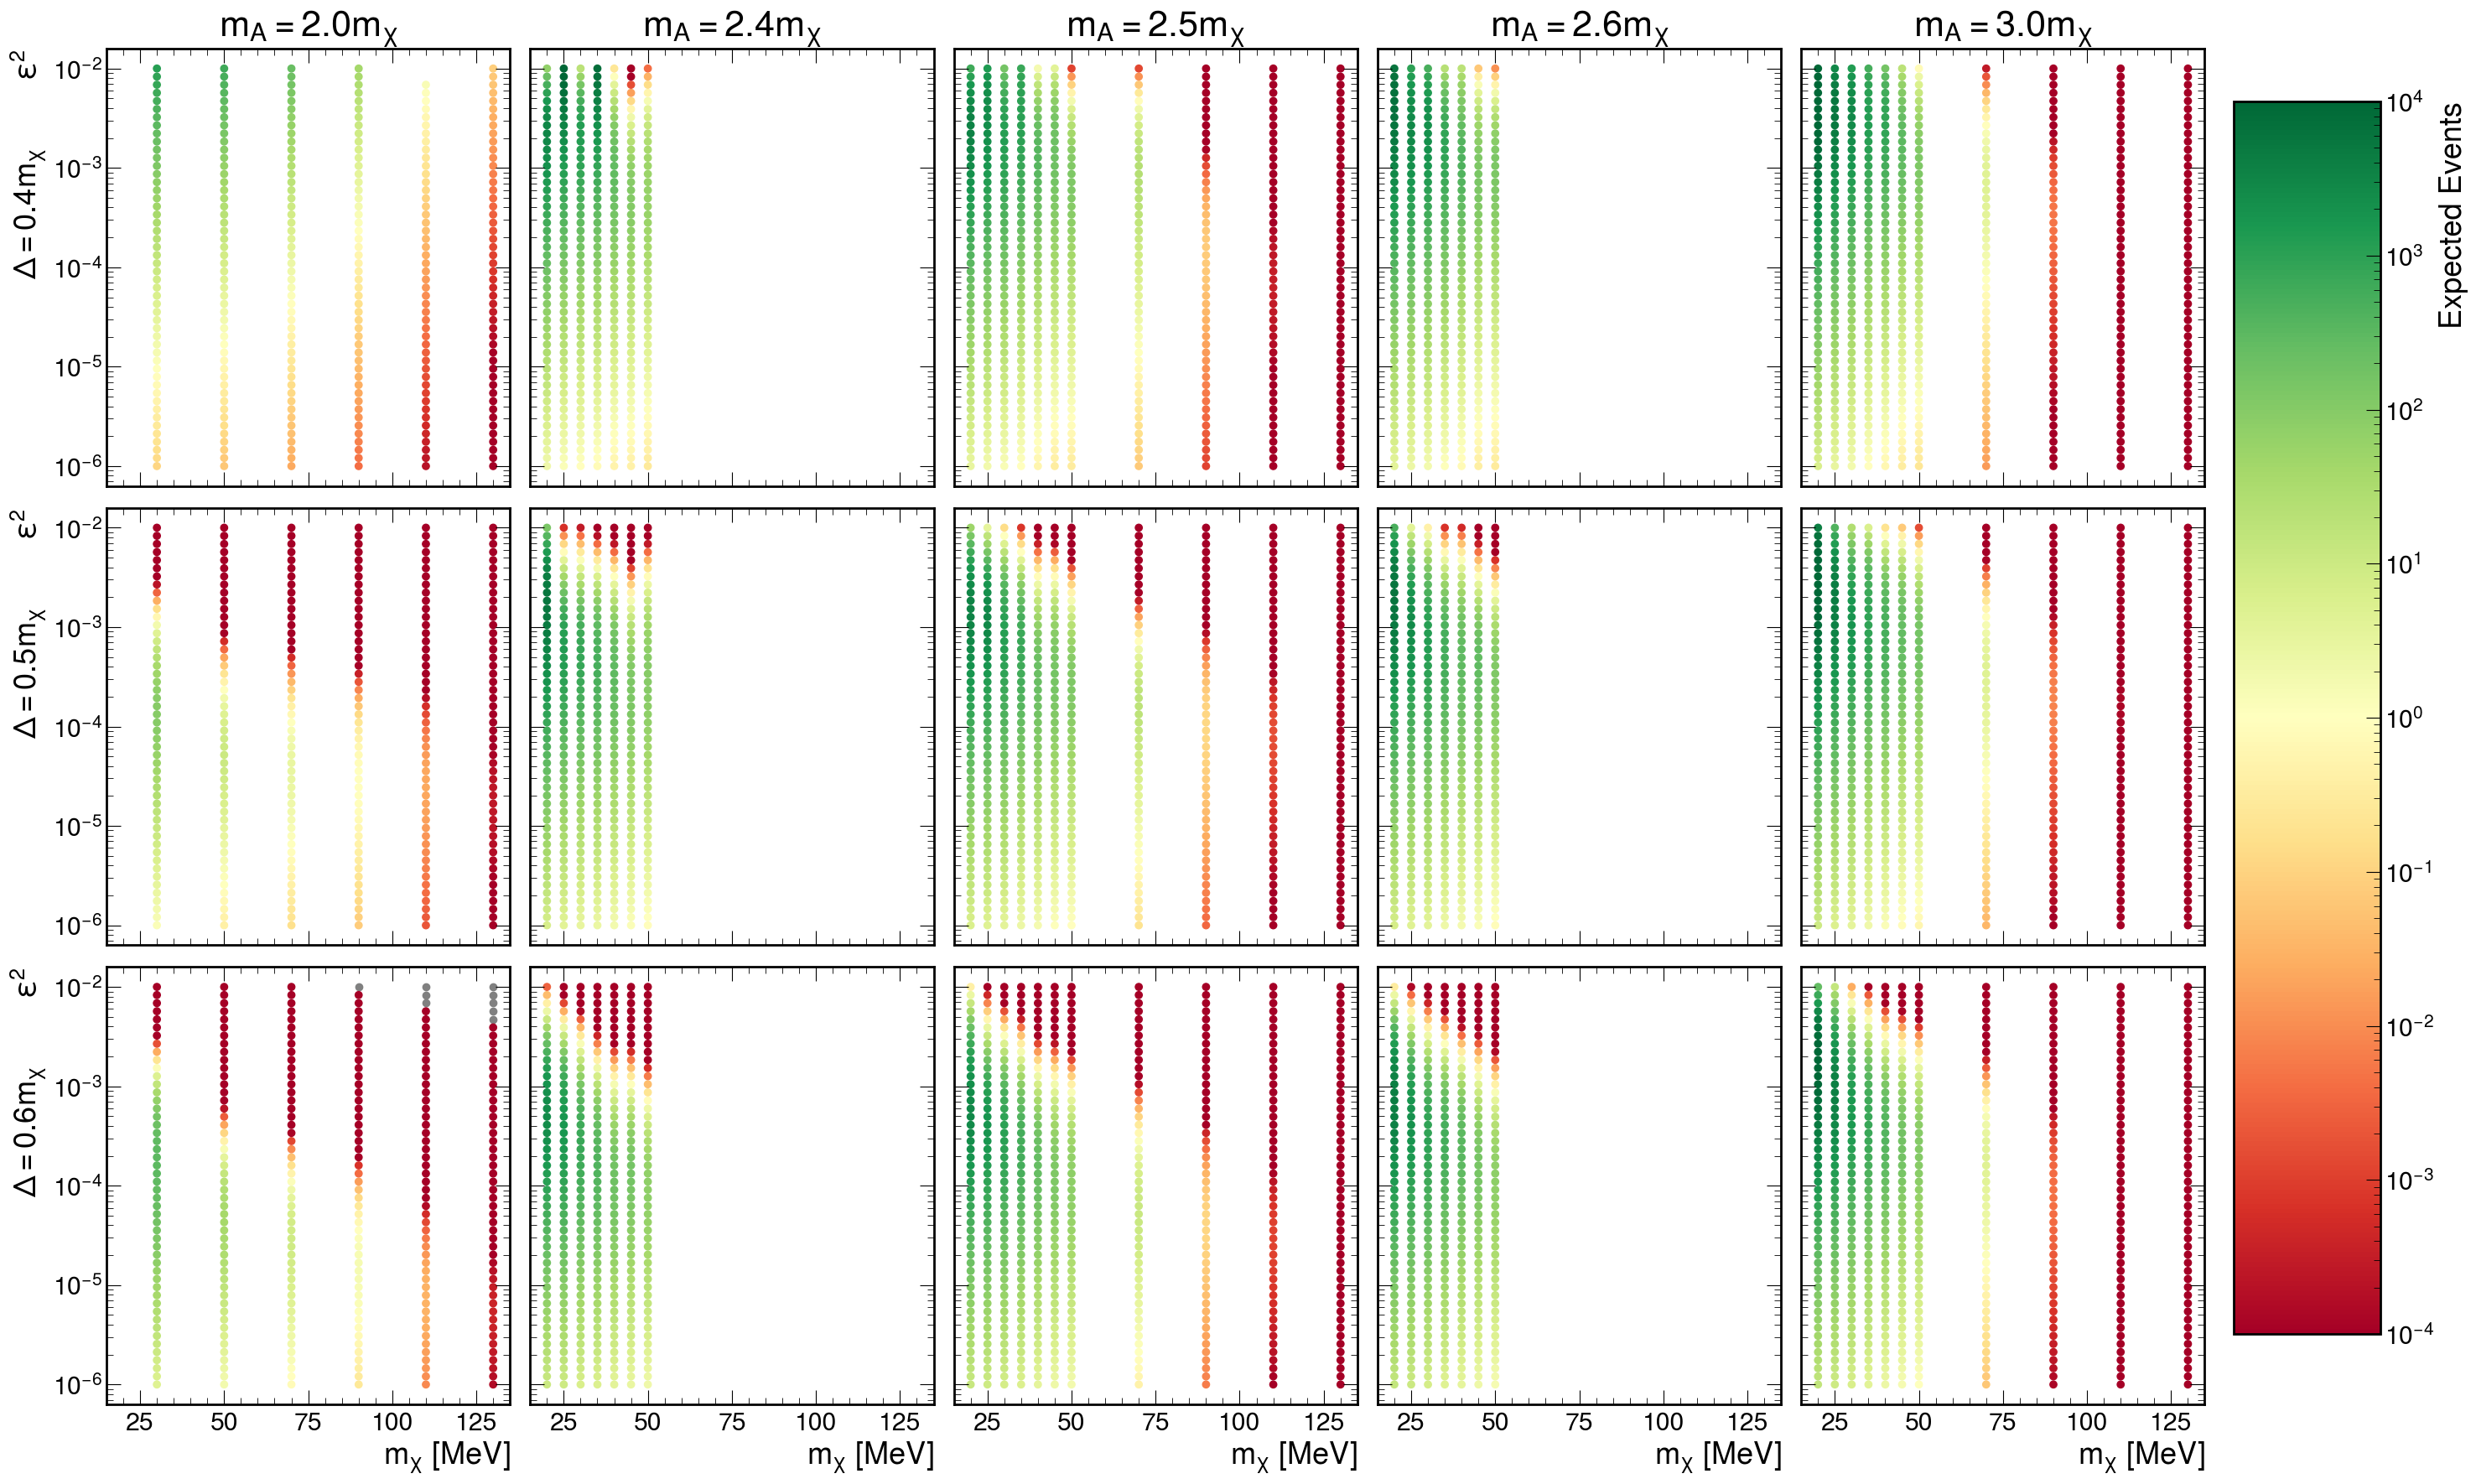

In [36]:
rmaps = np.unique(d['signal']['roacc'].rmap)
rdmchis = np.unique(d['signal']['roacc'].rdmchi)

def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

for rmap, rdmchi in cartesian_product(rmaps, rdmchis):
    print(rmap, rdmchi)

fig, axes = plt.subplots(
    nrows=len(rdmchis),
    ncols=len(rmaps),
    sharex = 'col',
    sharey = 'row',
    figsize = (7*len(rmaps),7*len(rdmchis)),
    gridspec_kw = dict(
        wspace = 0.05,
        hspace = 0.05
    )
)

for (rdmchi, rmap), ax in zip(
    cartesian_product(rdmchis, rmaps),
    axes.flatten()
):
    sl = d['signal']['roacc'][(
        (d['signal']['roacc'].rdmchi==rdmchi)
        &(d['signal']['roacc'].rmap==rmap)
    )]
    ax.scatter(sl.mchi[sl.mod_full_rate==0.0], sl.eps2[sl.mod_full_rate==0.0],
               color='gray')
    im = ax.scatter(sl.mchi, sl.eps2, c=sl.mod_full_rate,
                    norm=mpl.colors.LogNorm(1e-4, 1e4),
                    cmap='RdYlGn')
    ax.set_yscale('log')
    ax.set_xlim(xmin=15,xmax=135)

for rmap, ax in zip(rmaps, axes[0]):
    ax.set_title(f'$m_A = {rmap}m_\\chi$')

for irow, rdmchi in enumerate(rdmchis):
    axes[irow][0].set_ylabel(f'$\Delta = {rdmchi}m_\\chi$        $\epsilon^2$')
    
for ax in axes[-1]:
    ax.set_xlabel('$m_\\chi$ [MeV]')

fig.subplots_adjust(right=0.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Expected Events')
fig.savefig('plots/idm-reach-survey.pdf', bbox_inches='tight')
plt.show()

In [37]:
rate_maxima = d['signal']['roacc'].groupby(['rdmchi','rmap','mchi']).mod_full_rate.max().reset_index()

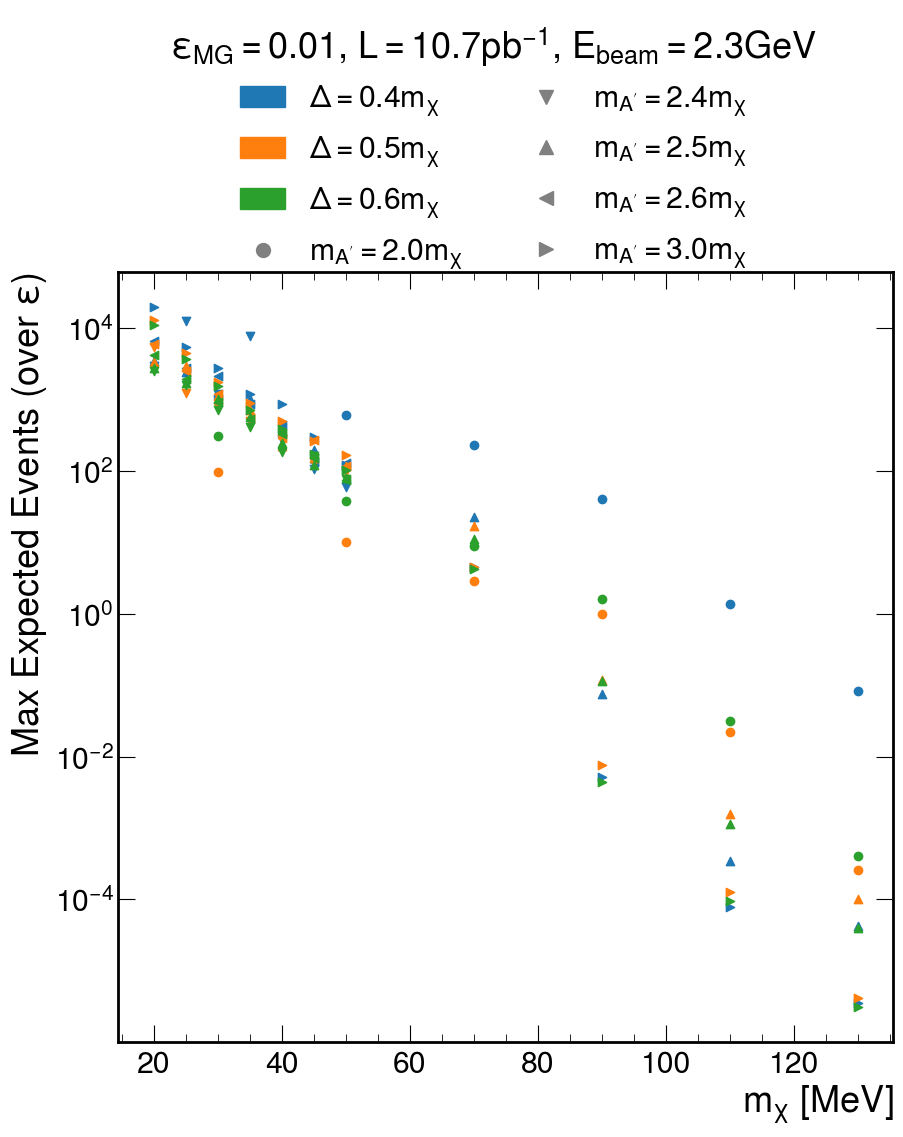

In [38]:
rdmchi = list(np.unique(rate_maxima.rdmchi))
rdmchi.sort()
colors = { r : c for r,c in zip(rdmchi, list(mpl.colors.TABLEAU_COLORS.keys())[:len(rdmchi)])}

rmaps = list(np.unique(rate_maxima.rmap))
rmaps.sort()
markers = { r : m for r, m in zip(rmaps, mpl.lines.Line2D.filled_markers[1:len(rmaps)+1]) }

# fig, axes = plt.subplots(
#     nrows = 2,
#     sharex = True,
#     gridspec_kw = dict(
#         hspace = 0,
#         bottom=0, top=1, left=0, right=1
#     )
# )
fig, ax = plt.subplots()

for rdmchi, color in colors.items():
    for rmap, marker in markers.items():
        sl=rate_maxima[(rate_maxima.rdmchi==rdmchi)&(rate_maxima.rmap==rmap)]
        if sum(sl.mod_full_rate) == 0:
            continue
        ax.scatter(sl.mchi, sl.mod_full_rate,
            color = color,
            marker = marker
        )
ax.set_yscale('log')

legend_artists = []
for rdmchi, color in colors.items():
    legend_artists.append(
        mpl.patches.Patch(
            facecolor=color, edgecolor=color, 
            label=f'$\\Delta = {rdmchi}m_\\chi$'
        )
    )
for rmap, marker in markers.items():
    legend_artists.append(
        mpl.lines.Line2D(
            [0],[0],
            marker = marker, color='gray', lw=0,
            markersize=10,
            label=f'$m_{{A\'}}={rmap}m_\\chi$'
        )
    )

fig.legend(
    title='$\\epsilon_\\mathrm{MG}=0.01$, $\\mathcal{L}=10.7\\mathrm{pb}^{-1}$, $E_\\mathrm{beam}=2.3$GeV',
    handles=legend_artists,
    ncols=2,
    loc='lower center',
    bbox_to_anchor=(0.5,0.85)
)

ax.set_xlabel('$m_\\chi$ [MeV]')
ax.set_ylabel('Max Expected Events (over $\\epsilon$)')
#fig.savefig('plots/maximum-reach.pdf', bbox_inches='tight')
plt.show()

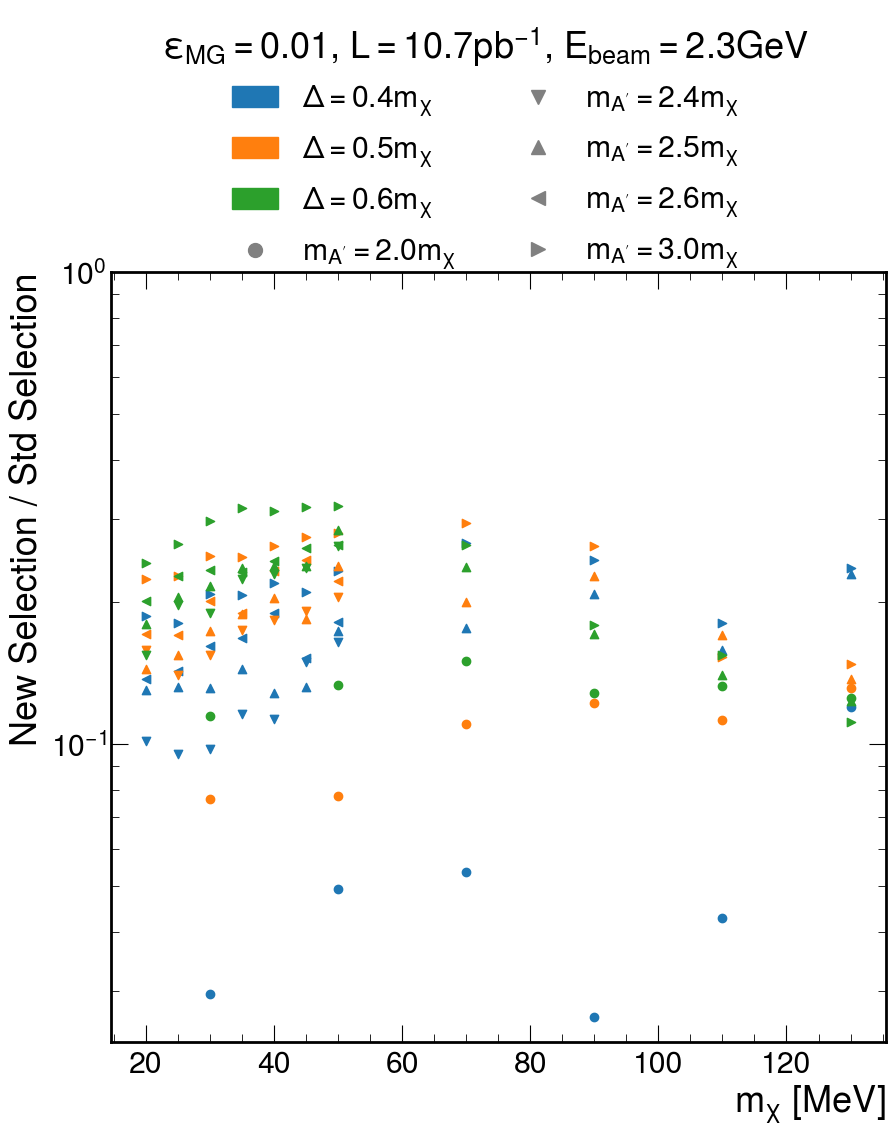

In [29]:
mod_to_std = d['signal']['roacc'].groupby(['rdmchi','rmap','mchi']).agg({'mod_num_pass':np.mean,'std_num_pass':np.mean}).reset_index()

mod_to_std['ratio'] = mod_to_std.mod_num_pass/mod_to_std.std_num_pass

# fig, axes = plt.subplots(
#     nrows = 2,
#     sharex = True,
#     gridspec_kw = dict(
#         hspace = 0,
#         bottom=0, top=1, left=0, right=1
#     )
# )
fig, ax = plt.subplots()

for rdmchi, color in colors.items():
    for rmap, marker in markers.items():
        sl=mod_to_std[(mod_to_std.rdmchi==rdmchi)&(mod_to_std.rmap==rmap)]
        ax.scatter(sl.mchi, sl.ratio,
            color = color,
            marker = marker
        )
ax.set_yscale('log')

legend_artists = []
for rdmchi, color in colors.items():
    legend_artists.append(
        mpl.patches.Patch(
            facecolor=color, edgecolor=color, 
            label=f'$\\Delta = {rdmchi}m_\\chi$'
        )
    )
for rmap, marker in markers.items():
    legend_artists.append(
        mpl.lines.Line2D(
            [0],[0],
            marker = marker, color='gray', lw=0,
            markersize=10,
            label=f'$m_{{A\'}}={rmap}m_\\chi$'
        )
    )

fig.legend(
    title='$\\epsilon_\\mathrm{MG}=0.01$, $\\mathcal{L}=10.7\\mathrm{pb}^{-1}$, $E_\\mathrm{beam}=2.3$GeV',
    handles=legend_artists,
    ncols=2,
    loc='lower center',
    bbox_to_anchor=(0.5,0.85)
)

ax.set_ylim(ymax=1)
ax.set_xlabel('$m_\\chi$ [MeV]')
ax.set_ylabel('New Selection / Std Selection')
#fig.savefig('plots/maximum-reach.pdf', bbox_inches='tight')
plt.show()

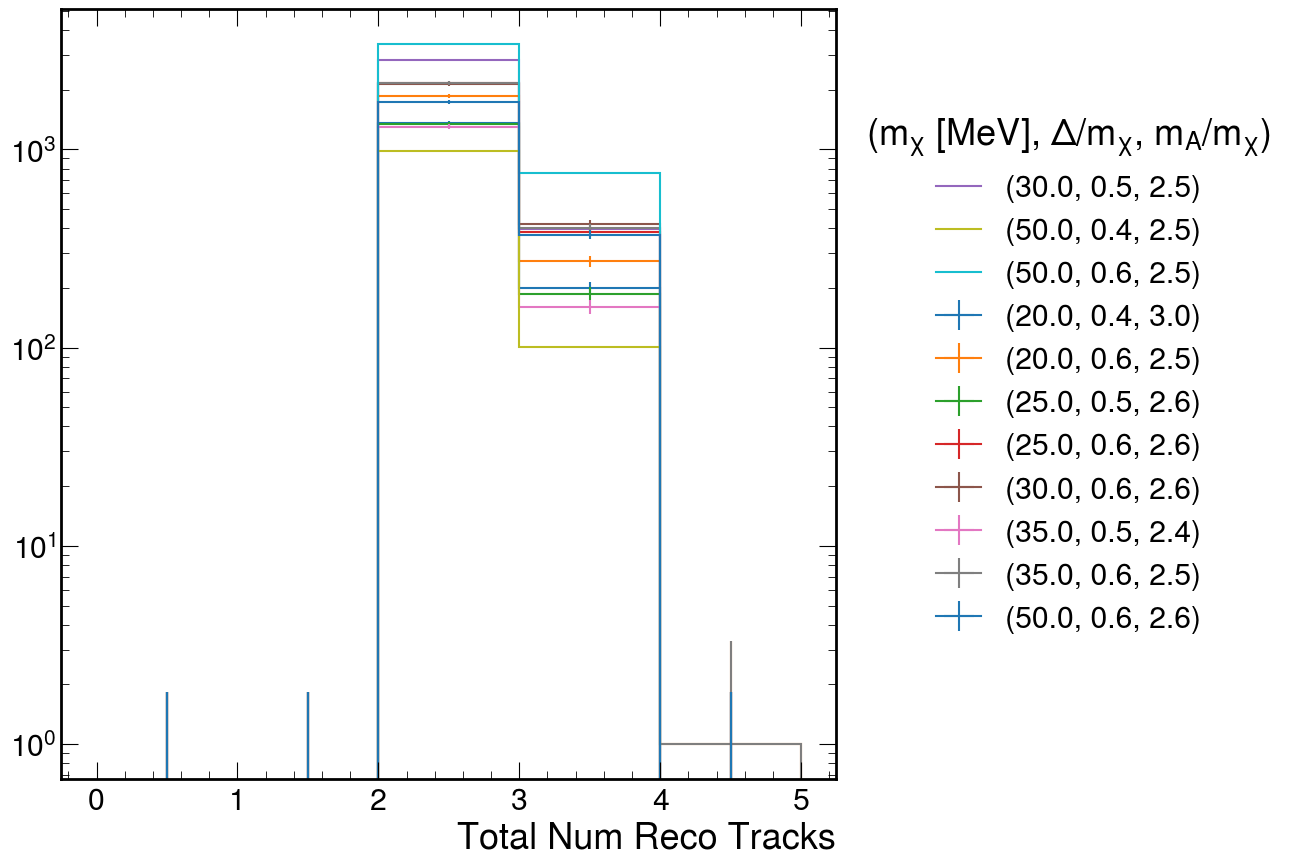

In [154]:
fig, ax = plt.subplots()
# ax.set_prop_cycle(
#     color=colors,
# )

ntracks = [
    (key, val.n_trks)
    for key, val in out.items()
    if isinstance(key, tuple)
]
ntracks.sort(key = lambda entry : entry[0])

for (mchi, rdmchi, rmap), h in ntracks:
    if rate_maxima[(rate_maxima.mchi==mchi)&(rate_maxima.rdmchi==rdmchi)&(rate_maxima.rmap==rmap)].full_rate.iloc[0] > 1.0:
        h.plot(label=f'{(mchi,rdmchi,rmap)}')
plt.legend(
    title='($m_\\chi$ [MeV], $\Delta/m_\\chi$, $m_{A}/m_\\chi$)',
    loc='upper left',
    bbox_to_anchor=(1.,0.9)
)
plt.yscale('log')
plt.savefig('plots/max-reach-over-1-n-tracks.pdf',bbox_inches='tight')
plt.show()